In [23]:
# Libs

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

import joblib
import os

In [2]:
# Dataset

data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# visualizando dados nulos

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Substituindo dados nulos da coluna 'Embarked' pela moda

embarkedIsnull = data['Embarked'].mode()[0]
data['Embarked'].fillna(embarkedIsnull, inplace=True)

In [5]:
# Verificando a substituição

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [6]:
# Verificando a moda das idades

data["Age"].mode()

0    24.0
Name: Age, dtype: float64

In [7]:
# adiciona moda em linhas nulas da coluna "Age"

age_mode = data["Age"].mode().astype(int)[0]
data["Age"].fillna(age_mode, inplace=True)

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [9]:
# removendo a coluna 'Cabin'

data.drop('Cabin', inplace=True, axis=1)

In [10]:
# quantidade de homens e mulheres

data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [11]:
survived = data['Survived'].sum()
print(f'Quantidade total de sobreviventes: {survived}')

Quantidade total de sobreviventes: 342


In [12]:
totalPas = len(data['PassengerId'])
print(f'Quantidade total de passageiro: {totalPas}')

Quantidade total de passageiro: 891


In [13]:
# porcentagem de passageiros por sexo

totalSex = data.groupby('Sex')['PassengerId'].count()
pSex = (totalSex / totalPas) * 100
print('Porcentagem de passsageiros por sexo: ')
print(pSex)

Porcentagem de passsageiros por sexo: 
Sex
female    35.241302
male      64.758698
Name: PassengerId, dtype: float64


In [14]:
pSurvived = (survived / totalPas) * 100
print(f'A porcentagem de sobreviventes é: {pSurvived:.0f}%')

A porcentagem de sobreviventes é: 38%


In [15]:
# porcentagem de sobreviventes por sexo

sSex = data.groupby('Sex')['Survived'].sum()
totalSex = data.groupby('Sex')['Survived'].count()
pSurSex = (sSex / totalSex) * 100
print('Porcentagem de sobreviventes por sexo: ')
print(pSurSex)

Porcentagem de sobreviventes por sexo: 
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


In [16]:
# qtd de sobreviventes por sexo

pd.crosstab(data["Survived"], data["Sex"], margins=True)

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [17]:
# Atribuindo 0 para 'male' e 1 para 'female'

data['Sex'] = data["Sex"].map({'male':0,'female':1})

<AxesSubplot:>

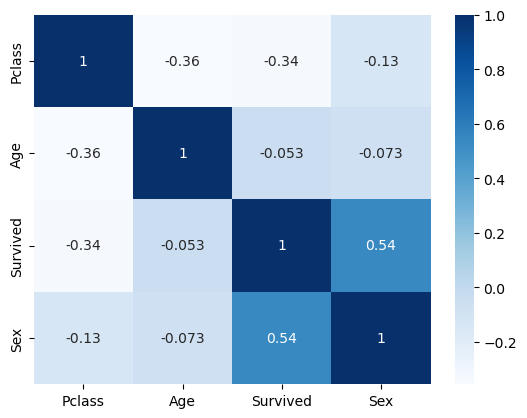

In [18]:
# correlação entre a idade, classe, sobrevivencia e sexo

sns.heatmap(data[['Pclass','Age','Survived','Sex']].corr(), cmap='Blues', annot=True)

In [19]:
# Sobreviventes por Classe

pd.crosstab(data['Survived'], data['Pclass'], margins=True).style.background_gradient(cmap='Blues') # colocando estilo

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [20]:
# media das idades das mulheres que sobreviveram

mean_female_survived = data[['Age','Survived','Sex']].loc[(data['Survived']== 1) & (data['Sex']==1)].mean()
mean_female_survived[0]

28.098712446351932

### Algumas conclusões

- o dataset possui um total de 891 passageiros,
- a quantidade total de sobreviventes é 342 passageiros que equivale a 38%,
- 65% dos passageiros são homens, ou seja, havia mais homens do que mulheres,
- 74% dos sobreviventes são mulheres,
- há uma alta correlação entre o sexo das pessoas e a Sobrevivencia,
- há uma correlação de 0.34 negativa nas variaveis Pclass e Survived,
- a classe que mais pessoas sobreviveram foi a classe 1,
- a média das idades das mulheres que sobreviveram é de 28 anos,
- a moda da idade dos passegeiros é 24 anos.

### Gerando o modelo

In [24]:
# atribui 0 para masculino e 1 para feminino

X = data[["Sex","Age","Pclass"]].copy()
y = data["Survived"]

X["Sex"] =X["Sex"].map({"male":0, "female":1})
X = X.fillna(-1)

In [25]:
# separa a base de teste 40%

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.40, random_state=42)

In [26]:
# gera o modelo DecisionTree

mdl = DecisionTreeClassifier(random_state=0, min_samples_leaf=8)
mdl.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=8, random_state=0)

In [28]:
# acuracia

p = mdl.predict(X_test)
accuracy_score(y_test, p)

0.6890756302521008

In [39]:
# testando o modelo
# dt_Test = pd.DataFrame({
#     "Sex":[1],
#     "Age":40,
#     "Pclass": [1]
# })
# mdl.predict(dt_Test)

In [40]:
# especificando o local que será salvo

mdl.fit(X,y)
joblib.dump(mdl, os.path.join("model.pk1"))

['model.pk1']